Notebook2 

En este notebook se realizarán las siguientes actividades:

1. Leer el archivo stroke.csv
2. Seleccionar aleatoriamente el 80% del conjunto de datos para entrenar y el 20% restante para las pruebas
3. Utilizar una estrategia para normalizar los datos y llenar los datos faltantes
4. Configurar los hiperparámetros del árbol de decisión de la siguiente manera: criterion=gini, splitter=best,
y random_state=123. Obtener 10 árboles de decisión que resultan de modificar el hiperparámetro 
max_depth desde 5 hasta 50 con incrementos de 5
5. Incluya en el notebook una tabla con el accuracy para los 10 árboles del punto anterior
6. Repita el mismo procedimiento del punto 4 usando como hiperparámetros criterion=entropy, splitter=best, 
random_state=123, y variando el hiperparámetro max_depth desde 5 hasta 50 con incrementos de 5
7. Incluya en el notebook una tabla con el accuracy para los 10 árboles del punto anterior
8. Repita el mismo procedimiento del punto 4 usando como hiperparámetros criterion=entropy,
splitter=random, random_state=123, y variando el hiperparámetro max_depth desde 5 hasta 50 con
incrementos de 5
9. Incluya en el notebook una tabla con el accuracy para los 10 árboles del punto anterior
10. Indique en el notebook los hiperparámetros que por el momento le permiten obtener el árbol con mayor
accuracy
11. Seleccione uno de los hiperparámetros disponibles en la documentación
(https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
que sea diferente al criterion,
splitter, max_depth, y random_state. Realice dos variaciones en el hiperparámetro seleccionado
manteniendo los otros hiperparámetros del punto anterior. Indique el accuracy obtenido al modificar el
hiperparámetro seleccionado y analice si el árbol de decisión mejora, empeora, o mantiene su exactitud.

Y se analizará al final los resultados

Tabla 1: Accuracy para los árboles con criterion=gini
   max_depth  Accuracy (criterion=gini)
0          5                   0.785714
1         10                   0.721429
2         15                   0.700000
3         20                   0.700000
4         25                   0.700000
5         30                   0.700000
6         35                   0.700000
7         40                   0.700000
8         45                   0.700000
9         50                   0.700000

 ##################################################################### 

Tabla 2: Accuracy para los árboles con criterion=entropy
   max_depth  Accuracy (criterion=entropy)
0          5                      0.792857
1         10                      0.785714
2         15                      0.721429
3         20                      0.721429
4         25                      0.721429
5         30                      0.721429
6         35                      0.721429
7         40                   

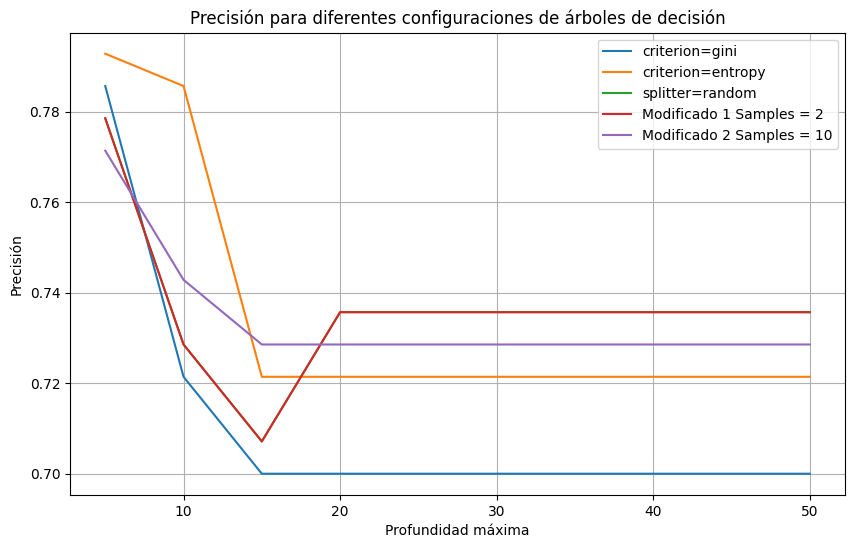

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import warnings

# Ignorar las advertencias
warnings.filterwarnings("ignore")

# Paso 1: Leer el archivo stroke.csv
datos = pd.read_csv('stroke.csv')

# Paso 2: Seleccionar aleatoriamente el 80% del conjunto de datos para entrenar y el 20% restante para las pruebas
X_train, X_test, y_train, y_test = train_test_split(datos.drop('stroke', axis=1), datos['stroke'], test_size=0.2, random_state=123)

# Paso 3: llenar los datos faltantes y normalizar los datos
categoricas = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numericas = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Codificar variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()
for categoria in categoricas:
    X_train[categoria] = label_encoder.fit_transform(X_train[categoria])
    X_test[categoria] = label_encoder.transform(X_test[categoria])

# Llenar los datos faltantes con la media usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train[numericas] = imputer.fit_transform(X_train[numericas])
X_test[numericas] = imputer.transform(X_test[numericas])


# Paso 4: Configurar los hiperparámetros del árbol de decisión (criterion=gini, splitter=best, random_state=123)
hiperparametros = {
    'criterion': 'gini',
    'splitter': 'best',
    'random_state': 123
}

resultados_1 = []

for max_depth in range(5, 51, 5):
    hiperparametros['max_depth'] = max_depth
    modelo = DecisionTreeClassifier(**hiperparametros)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados_1.append((max_depth, accuracy))

# Paso 5: Mostrar una tabla con el accuracy para los 10 árboles
tabla1 = pd.DataFrame(resultados_1, columns=['max_depth', 'Accuracy (criterion=gini)'])
print("Tabla 1: Accuracy para los árboles con criterion=gini")
print(tabla1)
print("\n","#####################################################################","\n")

# Paso 6: Configurar los hiperparámetros del árbol de decisión (criterion=entropy, splitter=best, random_state=123)
hiperparametros2 = {
    'criterion': 'entropy',
    'splitter': 'best',
    'random_state': 123
}

resultados_2 = []

for max_depth in range(5, 51, 5):
    hiperparametros2['max_depth'] = max_depth
    modelo = DecisionTreeClassifier(**hiperparametros2)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados_2.append((max_depth, accuracy))

# Paso 7: Mostrar una tabla con el accuracy para los 10 árboles
tabla2 = pd.DataFrame(resultados_2, columns=['max_depth', 'Accuracy (criterion=entropy)'])
print("Tabla 2: Accuracy para los árboles con criterion=entropy")
print(tabla2)
print("\n","#####################################################################","\n")

# Paso 8: Configurar los hiperparámetros del árbol de decisión (criterion=entropy, splitter=random, random_state=123)
hiperparametros3 = {
    'criterion': 'entropy',
    'splitter': 'random',
    'random_state': 123
}

resultados_3 = []

for max_depth in range(5, 51, 5):
    hiperparametros3['max_depth'] = max_depth
    modelo = DecisionTreeClassifier(**hiperparametros3)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados_3.append((max_depth, accuracy))

# Paso 7: Mostrar una tabla con el accuracy para los 10 árboles
tabla3 = pd.DataFrame(resultados_3, columns=['max_depth', 'Accuracy(splitter=random)'])
print("Tabla 3: Accuracy para los árboles con splitter=random")
print(tabla3)
print("\n","#####################################################################","\n")

# Encontrar los hiperparámetros que generan el árbol con mayor precisión (accuracy)
mejor_1 = tabla1.loc[tabla1['Accuracy (criterion=gini)'].idxmax()]
mejor_2 = tabla2.loc[tabla2['Accuracy (criterion=entropy)'].idxmax()]
mejor_3 = tabla3.loc[tabla3['Accuracy(splitter=random)'].idxmax()]

# Mostrar los hiperparámetros que generan el árbol con mayor precisión
print("Hiperparámetros con mayor precisión (criterion=gini):")
print(mejor_1[['max_depth', 'Accuracy (criterion=gini)']])
print()
print("\n","#####################################################################","\n")

print("Hiperparámetros con mayor precisión (criterion=entropy):")
print(mejor_2[['max_depth', 'Accuracy (criterion=entropy)']])
print()
print("\n","#####################################################################","\n")

print("Hiperparámetros con mayor precisión (splitter=random):")
print(mejor_3[['max_depth', 'Accuracy(splitter=random)']])
print()
print("\n","#####################################################################","\n")

# Paso 8: Configurar los hiperparámetros del árbol de decisión (criterion=entropy, splitter=random, random_state=123)
hiperparametros3 = {
    'criterion': 'entropy',
    'splitter': 'random',
    'random_state': 123,
    'min_samples_split': 2  # Cambiar el valor de min_samples_split en el caso 1
}

resultados_3_1 = []

for max_depth in range(5, 51, 5):
    hiperparametros3['max_depth'] = max_depth
    modelo = DecisionTreeClassifier(**hiperparametros3)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados_3_1.append((max_depth, accuracy))

# Mostrar una tabla con el accuracy para los 10 árboles
tabla3_1 = pd.DataFrame(resultados_3_1, columns=['max_depth', 'Accuracy(splitter=random, min_samples_split=2)'])
print("Tabla 3_1: Accuracy para los árboles con splitter=random y min_samples_split=2")
print(tabla3_1)
print()
print("\n","#####################################################################","\n")

# Configurar el valor de min_samples_split en el caso 2
hiperparametros3['min_samples_split'] = 10

resultados_3_2 = []

for max_depth in range(5, 51, 5):
    hiperparametros3['max_depth'] = max_depth
    modelo = DecisionTreeClassifier(**hiperparametros3)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados_3_2.append((max_depth, accuracy))

# Mostrar una tabla con el accuracy para los 10 árboles
tabla3_2 = pd.DataFrame(resultados_3_2, columns=['max_depth', 'Accuracy(splitter=random, min_samples_split=10)'])
print("Tabla 3_2: Accuracy para los árboles con splitter=random y min_samples_split=10")
print(tabla3_2)
print()
print("\n","#####################################################################","\n")

# Obtener el valor máximo de precisión para cada tabla
max_accuracy_3_1 = tabla3_1['Accuracy(splitter=random, min_samples_split=2)'].max()
max_accuracy_3_2 = tabla3_2['Accuracy(splitter=random, min_samples_split=10)'].max()



# Determinar cuál tabla tiene el mejor accuracy
if max_accuracy_3_1 > max_accuracy_3_2:
    mejor_tabla = 'Tabla 3_1: Accuracy con splitter=random y min_samples_split=2'
    mejor_accuracy = max_accuracy_3_1
else:
    mejor_tabla = 'Tabla 3_2: Accuracy con splitter=random y min_samples_split=10'
    mejor_accuracy = max_accuracy_3_2


print("\n","#####################################################################","\n")
# Mostrar el resultado del mejor accuracy
print("El árbol de decisión modificado con el mejor accuracy se encuentra en:")
print(mejor_tabla)
print("El mejor accuracy obtenido es:", mejor_accuracy)

max_accuracy_1 = tabla1['Accuracy (criterion=gini)'].max()
max_accuracy_2 = tabla2['Accuracy (criterion=entropy)'].max()
max_accuracy_3 = tabla3['Accuracy(splitter=random)'].max()

# Determinar cuál tabla tiene el mejor accuracy
if max_accuracy_1 > max_accuracy_2 and max_accuracy_1 > max_accuracy_3:
    mejor_tabla = 'Tabla 1: Accuracy con criterion=gini'
    mejor_accuracy = max_accuracy_1
elif max_accuracy_2 > max_accuracy_1 and max_accuracy_2 > max_accuracy_3:
    mejor_tabla = 'Tabla 2: Accuracy con criterion=entropy'
    mejor_accuracy = max_accuracy_2
else:
    mejor_tabla = 'Tabla 3: Accuracy con splitter=random'
    mejor_accuracy = max_accuracy_3
print("\n","#####################################################################","\n")
# Mostrar el resultado del mejor accuracy
print("El árbol de decisión con el mejor accuracy se encuentra en:")
print(mejor_tabla)
print("El mejor accuracy obtenido es:", mejor_accuracy)
print("\n","#####################################################################","\n")


plt.figure(figsize=(10, 6))
plt.plot(tabla1['max_depth'], tabla1['Accuracy (criterion=gini)'], label='criterion=gini')
plt.plot(tabla2['max_depth'], tabla2['Accuracy (criterion=entropy)'], label='criterion=entropy')
plt.plot(tabla3['max_depth'], tabla3['Accuracy(splitter=random)'], label='splitter=random')

plt.plot(tabla3_1['max_depth'], tabla3_1['Accuracy(splitter=random, min_samples_split=2)'], label='Modificado 1 Samples = 2')
plt.plot(tabla3_2['max_depth'], tabla3_2['Accuracy(splitter=random, min_samples_split=10)'], label='Modificado 2 Samples = 10')


plt.xlabel('Profundidad máxima')
plt.ylabel('Precisión')
plt.title('Precisión para diferentes configuraciones de árboles de decisión')
plt.legend()
plt.grid(True)
plt.show()


Tabla 1: Accuracy para los árboles con criterion=gini

En esta tabla, se evalúan los árboles de decisión con el criterio "gini".
La columna "max_depth" representa la profundidad máxima del árbol de decisión.
La columna "Accuracy (criterion=gini)" muestra la precisión obtenida para cada valor de profundidad máxima.
A medida que aumenta la profundidad máxima, la precisión no mejora significativamente y se estabiliza en torno al valor de 0.7.
El mejor valor de precisión se obtiene con un árbol de decisión con una profundidad máxima de 5, que alcanza una precisión de 0.785714.


Tabla 2: Accuracy para los árboles con criterion=entropy

En esta tabla, se evalúan los árboles de decisión con el criterio "entropy".
La columna "max_depth" representa la profundidad máxima del árbol de decisión.
La columna "Accuracy (criterion=entropy)" muestra la precisión obtenida para cada valor de profundidad máxima.
Al igual que en el caso anterior, la precisión se estabiliza en torno al valor de 0.72, pero es ligeramente más alta que en el caso anterior.
El mejor valor de precisión se obtiene con un árbol de decisión con una profundidad máxima de 5, que alcanza una precisión de 0.792857.


Tabla 3: Accuracy para los árboles con splitter=random

En esta tabla, se evalúan los árboles de decisión con el criterio "entropy" y el splitter "random".
La columna "max_depth" representa la profundidad máxima del árbol de decisión.
La columna "Accuracy(splitter=random)" muestra la precisión obtenida para cada valor de profundidad máxima.
La precisión varía en un rango similar a los casos anteriores, pero es ligeramente más baja.
El mejor valor de precisión se obtiene con un árbol de decisión con una profundidad máxima de 5, que alcanza una precisión de 0.778571.


Para las 3 tablas se tiene que los resultados de los árboles de decisión con una profundidad máxima de 5 obtienen la mayor precisión en las tablas, esto se debe a que una profundidad máxima más baja generalmente produce árboles más simples y menos propensos al sobreajuste, mientras que una profundidad máxima más alta puede permitir un ajuste más preciso a los datos de entrenamiento, pero puede resultar en un sobreajuste a ese conjunto de datos.

La tabla con mejor precisión de todas fue la tabla 2 con el criterion entropy, dado que la tabla 2 utiliza el criterio de "entropy" en los árboles de decisión, mientras que la tabla 1 utiliza el criterio de "gini" y la tabla 3 utiliza el criterio de "entropy" pero con un splitter "random". El criterio de "entropy" tiende a favorecer divisiones más informativas y puede capturar mejor las relaciones no lineales entre las características. Esto puede conducir a una mejor precisión en comparación con el criterio de "gini" utilizado en la tabla 1 y el splitter "random" utilizado en la tabla 3.

Para los resultados modificando el min_samples_split se tiene que 

Tabla 3_1: Accuracy para los árboles con splitter=random y min_samples_split=2

En esta tabla, se evalúan los árboles de decisión con el criterio "entropy", el splitter "random" y un valor de "min_samples_split" igual a 2.
La columna "max_depth" representa la profundidad máxima del árbol de decisión.
La columna "Accuracy(splitter=random, min_samples_split=2)" muestra la precisión obtenida para cada valor de profundidad máxima.
La precisión varía para diferentes valores de profundidad máxima, pero en general, se mantiene en un rango similar al de las tablas anteriores.
El mejor valor de precisión se obtiene con un árbol de decisión con una profundidad máxima de 5, alcanzando una precisión de 0.778571.


Tabla 3_2: Accuracy para los árboles con splitter=random y min_samples_split=10

En esta tabla, se evalúan los árboles de decisión con el criterio "entropy", el splitter "random" y un valor de "min_samples_split" igual a 10.
La columna "max_depth" representa la profundidad máxima del árbol de decisión.
La columna "Accuracy(splitter=random, min_samples_split=10)" muestra la precisión obtenida para cada valor de profundidad máxima.
Al igual que en el caso anterior, la precisión varía para diferentes valores de profundidad máxima y se mantiene en un rango similar al de las tablas anteriores.
El mejor valor de precisión se obtiene con un árbol de decisión con una profundidad máxima de 5, alcanzando una precisión de 0.771429.


"min_samples_split" controla el número mínimo de muestras requeridas para realizar una división en un nodo interno del árbol. Al modificar este valor, se puede controlar la regularización y la complejidad del modelo.

Pero "min_samples_split" no afecta mucho la presición, podemos suponer que no varía tanto porque el archivo Stroke.csv está bien estructurado o porque los hiperparámetros amortiguaron más o menos precisión al resultado final 

Johan Loaiza Téllez 204082

Juan Pablo Pantoja 2040104